## Definición de Problema y Objetivos

### Problema
En la industria musical y análisis de datos, identificar automáticamente el **género de una canción** a partir de sus características musicales es un reto importante.Los datasets musicales contienen múltiples variables (como `popularity`, `danceability`, `energy`, `loudness`, `tempo`, entre otras), y estas variables pueden tener diferentes escalas, valores faltantes o inconsistencias que dificultan el entrenamiento de un modelo de clasificación preciso.

### Objetivo General
Desarrollar un **modelo de clasificación de géneros musicales** capaz de predecir de manera precisa el género de una canción utilizando sus atributos musicales, con especial atención a la calidad de los datos y el preprocesamiento.

### Objetivos Específicos

1. **Análisis de importancia de variables:**
   - Seleccionar las variables más relevantes.
   - Identificar cuáles características influyen más en la predicción de género (`popularity`, `danceability`, `energy`, etc.).  
   - Crear gráficos para mostrar la distribución de los datos originales y estandarizados.
   - Visualizar la relevancia de cada variable para entender mejor el modelo y su comportamiento
   
2. **Preprocesamiento de datos:**  
   - Rellenar valores faltantes con la mediana para mantener consistencia.  
   - Codificar la variable objetivo (`music_genre`) a formato numérico.  
   - Estandarizar los datos para que todas las variables tengan la misma escala.

3. **Entrenamiento del modelo:**  
   - Dividir los datos en conjuntos de entrenamiento y prueba.  
   - Entrenar un 'RandomForestClassifier' y 'XGBClassifier' optimizando los hiperparámetros clave para mejorar la precisión.  
   - Evaluar el modelo usando métricas como accuracy, recall, F1-score y matriz de confusión.

4. **Visualización y presentación de resultados:**  
   - Mostrar la relación entre las variables más importantes y el género musical.  
   - Presentar la matriz de confusión y las métricas para evaluar la efectividad del modelo.

### Solución Propuesta
Se propone un **flujo completo de procesamiento y modelado** que incluye:

1. Limpieza y transformación de datos.  
2. Codificación y estandarización de variables.  
3. Entrenamiento y prueba de varios modelos.  
4. Evaluación y visualización de resultados mediante métricas y gráficos.  

Este enfoque permite predecir géneros musicales de manera eficiente y entender qué características musicales influyen más en la clasificación.


Cargar el dataset original


Crear Notebook notebooks

## Primera celda: leer CSV y manejar problemas comunes de formato:

In [11]:
import pandas as pd
from plotnine import (
    ggplot, aes, geom_point, geom_abline,
    labs, theme, element_line, scale_color_manual,
    coord_cartesian, xlim, ylim
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


### Exploración inicial de datos (EDA)

In [2]:
import pandas as pd

# Cargar CSV con parámetros que manejan comas dentro de los campos y valores faltantes
df = pd.read_csv(
    "dataset//music_genre.csv"
)
# Reemplazar las claves con valores numéricos
df['key'] = df['key'].replace(('C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'), range(0, 12))
# Filtrar solo las columnas importantes y modificar géneros
df['music_genre'] = df['music_genre'].apply(
    lambda genre: 'Rap' if genre == 'Hip-Hop' and genre not in ['Alternative', 'Anime'] else genre)
# Reemplazar modo con binario
df['mode'] = df['mode'].apply(lambda mode: 0 if mode == 'Minor' else 1 if mode == 'Major' else mode)

df_filtrado = df[
    (df['music_genre'] != 'Anime') & (df['music_genre'] != 'Alternative') & (df['tempo'] != '?') & (df['music_genre'].notna())
][['artist_name', 'track_name' , 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'mode', 'speechiness', 'music_genre', 'duration_ms', 'valence', 'key', 'liveness', 'tempo']]

# Guardar versión filtrada para análisis posterior
df_filtrado.to_csv("dataset//fdata.csv", index=False)
# Ver filas filtradas
print(df.head())


C:\Users\mrnoe\AppData\Local\Temp\ipykernel_15044\4271727314.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


   instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      24907.0           What So Not      Divide & Conquer        32.0   
4      89064.0            Axel Boman                 Hello        47.0   

   acousticness  danceability  duration_ms  energy  instrumentalness   key  \
0       0.00468         0.652         -1.0   0.941            0.7920  10.0   
1       0.01270         0.622     218293.0   0.890            0.9500   2.0   
2       0.00306         0.620     215613.0   0.755            0.0118   8.0   
3       0.00465         0.638     222369.0   0.587            0.9090   6.0   
4       0.00523         0.755     519468.0   0.731            0.8540   2.0   

   liveness  loudness  mode  speechiness               tempo obtained_date  \
0     0.

### Visualización de datos con plotnine

---

La gráfica que vemos muestra la importancia de cada variable en el modelo de clasificación de géneros musicales.  
Cada barra representa una característica del audio, como `acousticness` o `loudness`, y su altura indica cuánto contribuye esa variable a que el modelo acierte en la predicción del género.

Por ejemplo, si la barra de `acousticness` es más alta que la de `loudness`, significa que el modelo considera que la característica acústica es más relevante para diferenciar los géneros musicales en este dataset.

Esta información nos ayuda a entender qué aspectos musicales son más útiles para que una inteligencia artificial clasifique correctamente las canciones según su género.
Así, podemos saber en qué variables debemos enfocarnos si queremos mejorar el modelo o analizar la música desde un punto de vista técnico.

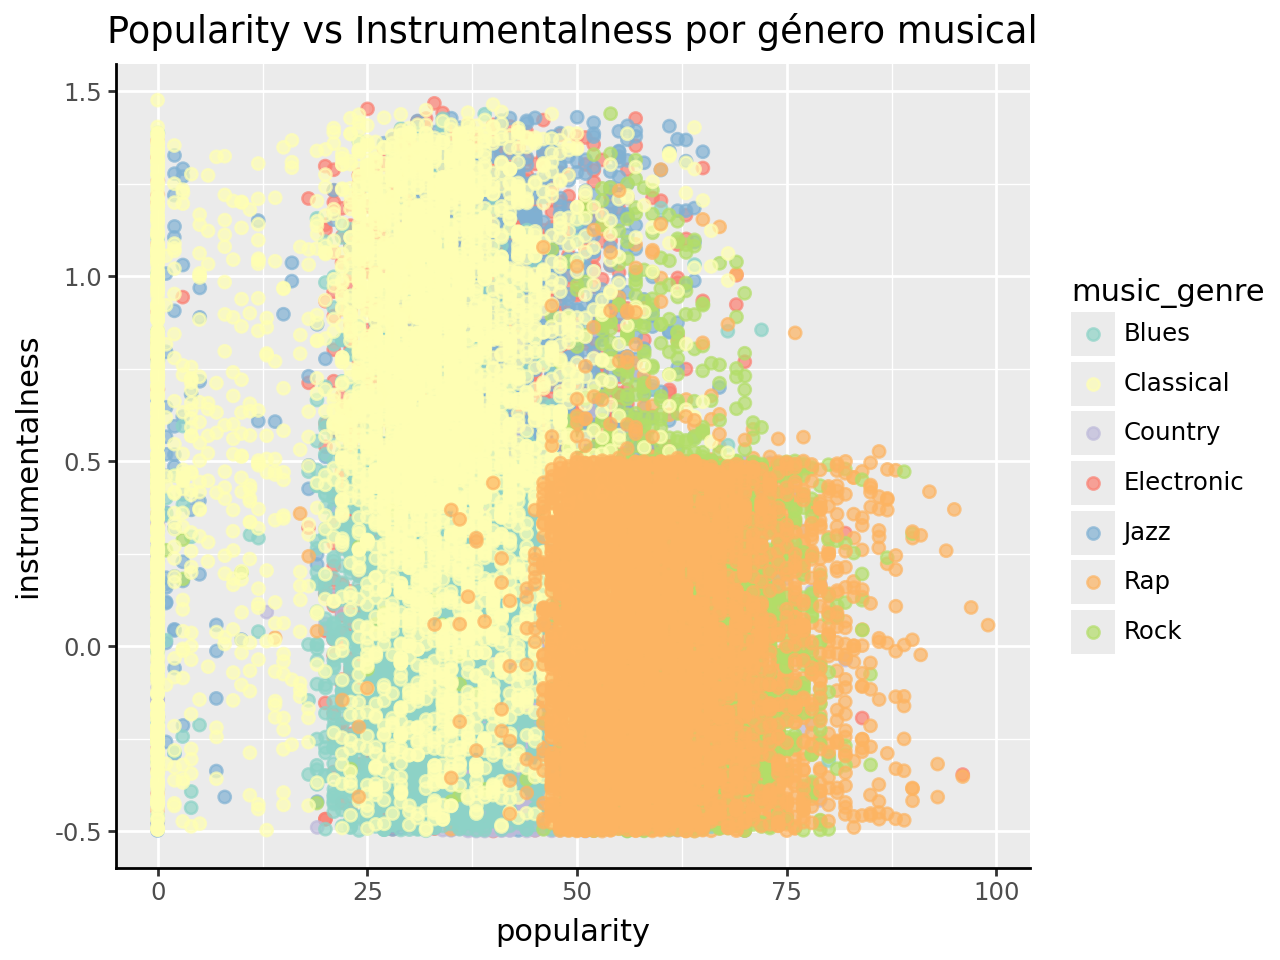

In [3]:
from plotnine import ggplot, aes, geom_jitter, labs, theme, element_line, scale_color_brewer
import pandas as pd

# Leer CSV filtrado
df_filtrado = pd.read_csv("dataset/fdata.csv")

plot = (#aqui cambie por danceability porque 
    ggplot(df_filtrado, aes(x='popularity', y='instrumentalness', color='music_genre'))
    + geom_jitter(width=0.02, height=0.5, size=2, alpha=0.7)  # Jitter para separar puntos
    + scale_color_brewer(type='qual', palette='Set3')         # Paleta de colores variada
    + labs(title='Popularity vs Instrumentalness por género musical',  # aqui cambie el titulo porque lo q estabamos realmente usado era la   danceability PERO SI QUIEREN CAMBIAR LO PUEDEN HACER tocaria cambiar en el resto del codigo tambien
           x='popularity', y='instrumentalness')
    + theme(
        axis_line_x=element_line(color='black', size=1),
        axis_line_y=element_line(color='black', size=1)
    )
)

# Mostrar gráfico en el notebook
plot


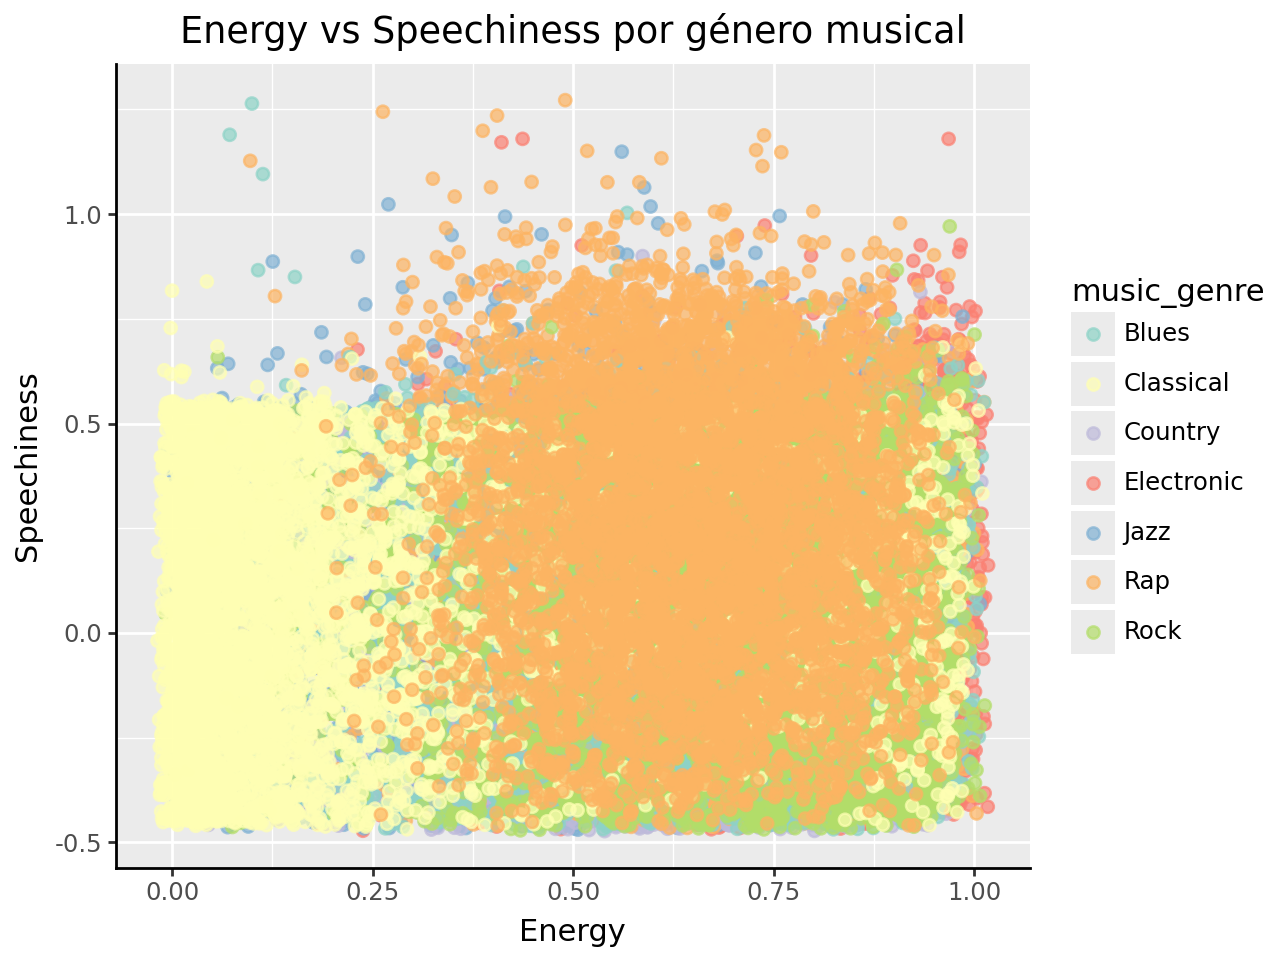

In [5]:
from plotnine import ggplot, aes, geom_jitter, labs, theme, element_line, scale_color_brewer
import pandas as pd

# Leer CSV filtrado
df_filtrado = pd.read_csv("dataset/fdata.csv")

plot = (
    ggplot(df_filtrado, aes(x='energy', y='speechiness', color='music_genre'))
    + geom_jitter(width=0.02, height=0.5, size=2, alpha=0.7)  # Jitter para separar puntos
    + scale_color_brewer(type='qual', palette='Set3')         # Paleta de colores variada
    + labs(title='Energy vs Speechiness por género musical',
           x='Energy', y='Speechiness')                      # Ajuste de etiquetas
    + theme(
        axis_line_x=element_line(color='black', size=1),
        axis_line_y=element_line(color='black', size=1)
    )
)

plot


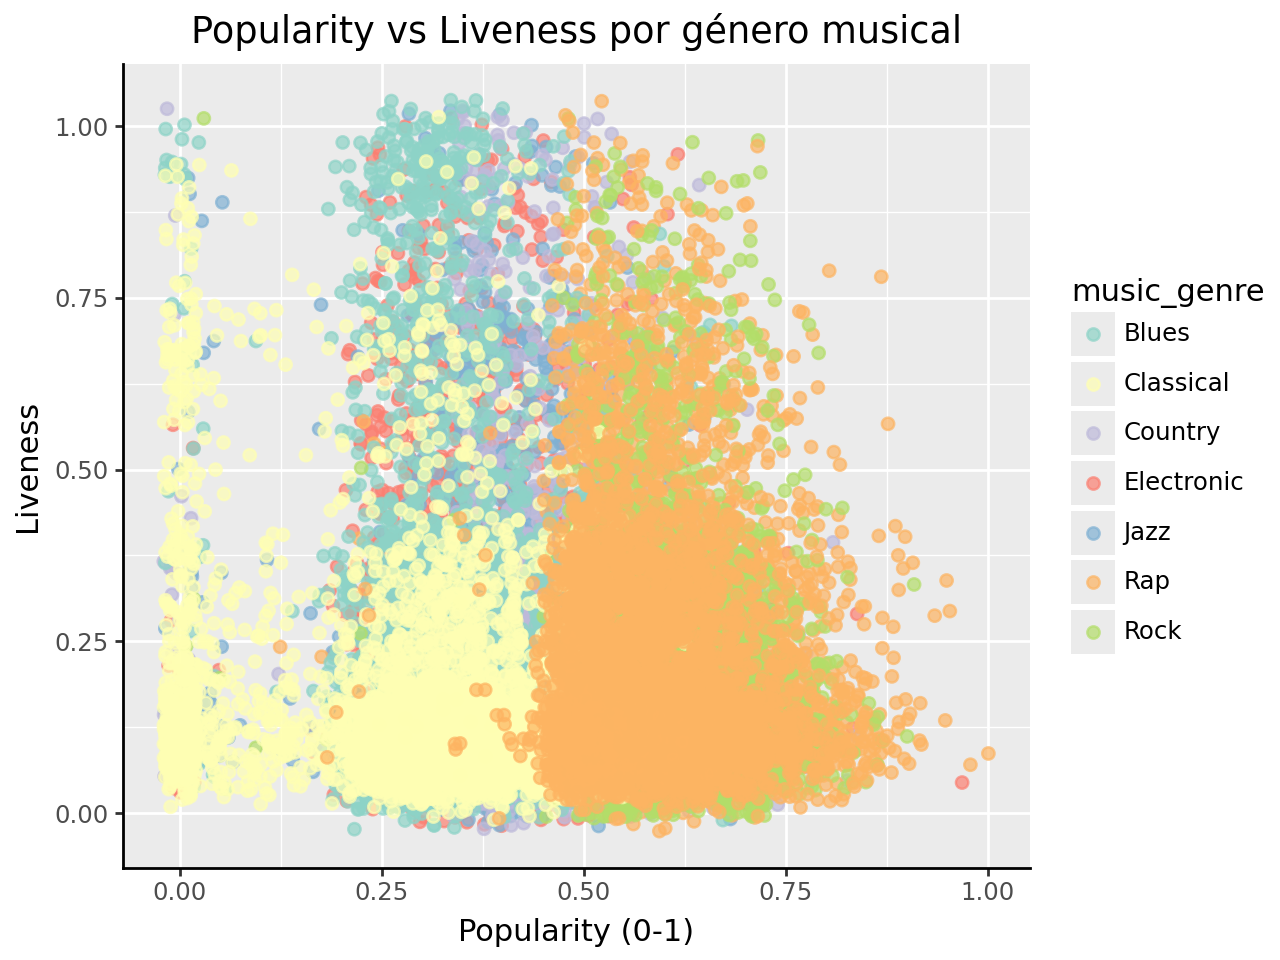

In [15]:
from plotnine import ggplot, aes, geom_jitter, labs, theme, element_line, scale_color_brewer
import pandas as pd

# Leer CSV filtrado
df_filtrado = pd.read_csv("dataset/fdata.csv")

# Escalar popularity a 0-1 para que tenga la misma escala que las demás variables
df_filtrado['popularity_scaled'] = df_filtrado['popularity'] / 100

# Crear gráfico usando la variable escalada
plot = (
    ggplot(df_filtrado, aes(x='popularity_scaled', y='liveness', color='music_genre'))
    + geom_jitter(width=0.02, height=0.05, size=2, alpha=0.7)
    + scale_color_brewer(type='qual', palette='Set3')
    + labs(title='Popularity vs Liveness por género musical',
           x='Popularity (0-1)', y='Liveness')
    + theme(
        axis_line_x=element_line(color='black', size=1),
        axis_line_y=element_line(color='black', size=1)
    )
)

# Mostrar gráfico
plot



### Preprocesamiento de datos



---



En el preprocesamiento de datos, seleccionamos las variables relevantes, codificamos la variable objetivo (`music_genre`) y estandarizamos los datos para que todas las variables tengan la misma escala. La gráfica muestra cómo los datos originales se transforman tras la estandarización, lo que ayuda a que el modelo de clasificación funcione mejor y no se vea afectado por diferencias de escala entre las variables.



### Selección de variables
Seleccionamos las variables explicativas para la predicción:
`track_name`, `artist_name`, `popularity` , `acousticness`, `danceability`, `duration_ms`, `energy`, `instrumentalness`, `liveness`, `loudness`, `mode`, `speechiness`, `tempo`, `valence` y la variable objetivo: `music_genre`.

---

### Tratamiento de tipos  
- Utilizamos un LabelEnconder para convertir cadenas en números.

---

### Estandarización
Usamos `StandardScaler` para que todas las variables numéricas tengan la misma escala (media 0 y desviación 1).

---

### División en entrenamiento y prueba
Separamos los datos en `X_train`, `X_test`, `y_train` y `y_test` con un 25% de los datos para prueba.

---

### Visualización de los datos antes y después de estandarizar
- La gráfica **izquierda** muestra los datos originales, donde cada variable tiene su propia escala.  
- La gráfica **derecha** muestra los datos después de la estandarización, donde todas las variables están en la misma escala.

---


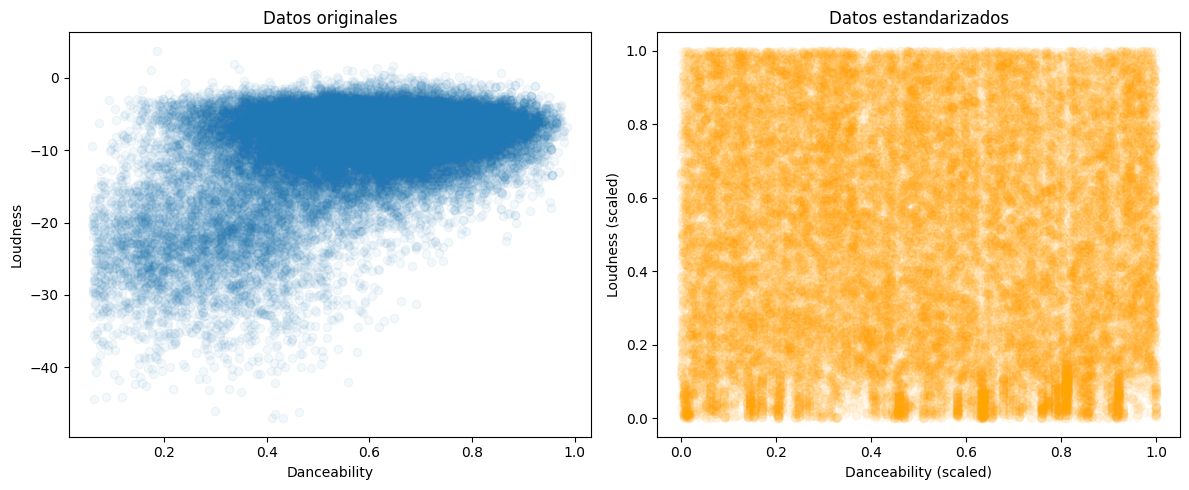

In [ ]:
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

le = LabelEncoder()
# Selección de variables
df_filtrado['artist_name_enc'] = le.fit_transform(df_filtrado['artist_name'])
df_filtrado['track_name_enc'] = le.fit_transform(df_filtrado['track_name'])
X = df_filtrado[['artist_name_enc', 'track_name_enc', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness',  'mode', 'speechiness', 'duration_ms', 'valence','key', 'liveness', 'tempo']]
y = df_filtrado['music_genre']

# Codificar etiquetas de texto a números

y_encoded = le.fit_transform(y)

# Escalar características numéricas
scaler = QuantileTransformer()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.25, random_state=42)

# Visualización de datos antes y después de escalar
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Antes de escalar
axs[0].scatter(X['danceability'], X['loudness'], alpha=0.05)
axs[0].set_title('Datos originales')
axs[0].set_xlabel('Danceability')
axs[0].set_ylabel('Loudness')

# Después de escalar
axs[1].scatter(X_scaled[:,1], X_scaled[:,7], alpha=0.05, color='orange')  
axs[1].set_title('Datos estandarizados')
axs[1].set_xlabel('Danceability (scaled)')
axs[1].set_ylabel('Loudness (scaled)')

plt.tight_layout()
plt.show()




**Explicación:**  
- La tabla de métricas mostrará precisión, recall y F1-score para cada género musical, permitiendo comparar el desempeño por clase y ver la precisión general.


- La estandarización ayuda a que el modelo no se vea afectado por diferencias de escala, aunque para este tipo de modelo no es estrictamente necesario, mejora la visualización y la consistencia de los datos.


La gráfica de la izquierda muestra los datos originales, donde cada variable tiene su propia escala.
La gráfica de la derecha muestra los datos después de la estandarización, donde ambas variables tienen la misma escala.

### Entrenamiento de modelo

Aquí los hiperparámetros son:

n_estimators=100 (número de árboles)
random_state=42 (semilla para reproducibilidad)

<h3>Modelo de arbol de decisión</h3>

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar Random Forest con hiperparámetros optimizados 
model = RandomForestClassifier(
    n_estimators=1000,       # Más árboles para mayor estabilidad
    max_depth=25,            # Limita profundidad para evitar sobreajuste
    min_samples_leaf=15,     # Evita hojas con pocas muestras
    max_features='sqrt',     # Mejora precisión combinando variables
    random_state=42,
    n_jobs=-1,               # Usa todos los núcleos disponibles
    class_weight='balanced'  # Maneja clases desbalanceadas
)

model.fit(X_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,25
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h3>Modelo de gradient boosting</h3>

Instalar con <label style="color:springgreen;"><b>python - pip install xgboost</b></label>.

In [ ]:
# Import XGBoost
from xgboost import XGBClassifier

# Create the XGBoost model
model = XGBClassifier(
    n_estimators=500,         # Number of trees
    max_depth=6,              # Maximum depth of trees
    learning_rate=0.05,       # Smaller learning rate
    subsample=0.8,            # Use 80% of the data for each tree
    colsample_bytree=0.8,     # Use 80% of features for each tree
    min_child_weight=3,       # Minimum child weight
    gamma=1,                  # Minimum loss reduction for splits
    random_state=42,          # For reproducibility
    objective='multi:softmax',# Multi-class classification
    eval_metric='mlogloss',   # Log loss for multi-class
)

# Train the model
model.fit(X_train, y_train)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


### Evaluación del modelo

## ¿Qué es la matriz de confusión?

Es una tabla que te muestra cuántas veces el modelo predijo correctamente o incorrectamente cada clase (género musical).

---

### ¿Cómo leerla?

- **Filas:** Representan los géneros reales (verdaderos) de las canciones.
- **Columnas:** Representan los géneros que el modelo predijo.

Cada celda indica el número de canciones que pertenecen al género de la fila y fueron clasificadas como el género de la columna.

---

#### Ejemplo visual

|         | Predicho: Rock | Predicho: Jazz |
|---------|----------------|----------------|
| Real: Rock  |     18         |      1        |
| Real: Jazz  |      2         |     15        |

- **Diagonal principal (de arriba a la izquierda a abajo a la derecha):** Son los aciertos (predicciones correctas).
- **Fuera de la diagonal:** Son los errores (por ejemplo, canciones de Jazz clasificadas como Pop).

---

### ¿Qué géneros son más fáciles de predecir?

- Si un género tiene casi todos sus valores en la diagonal, el modelo lo predice bien.
- Si hay muchos valores fuera de la diagonal para un género, el modelo se confunde con otros géneros.

---

**Consejo:** Busca los valores más altos en la diagonal para saber qué géneros se predicen mejor y observa los errores para saber dónde el modelo falla.


Accuracy: 0.7752858887531919

Reporte de clasificación:
               precision    recall  f1-score   support

       Blues       0.74      0.67      0.70      1129
   Classical       0.93      0.92      0.92      1154
     Country       0.72      0.68      0.70      1100
  Electronic       0.73      0.72      0.73      1116
        Jazz       0.67      0.62      0.64      1153
         Rap       0.89      0.91      0.90      2250
        Rock       0.64      0.76      0.69      1105

    accuracy                           0.78      9007
   macro avg       0.76      0.76      0.76      9007
weighted avg       0.78      0.78      0.77      9007



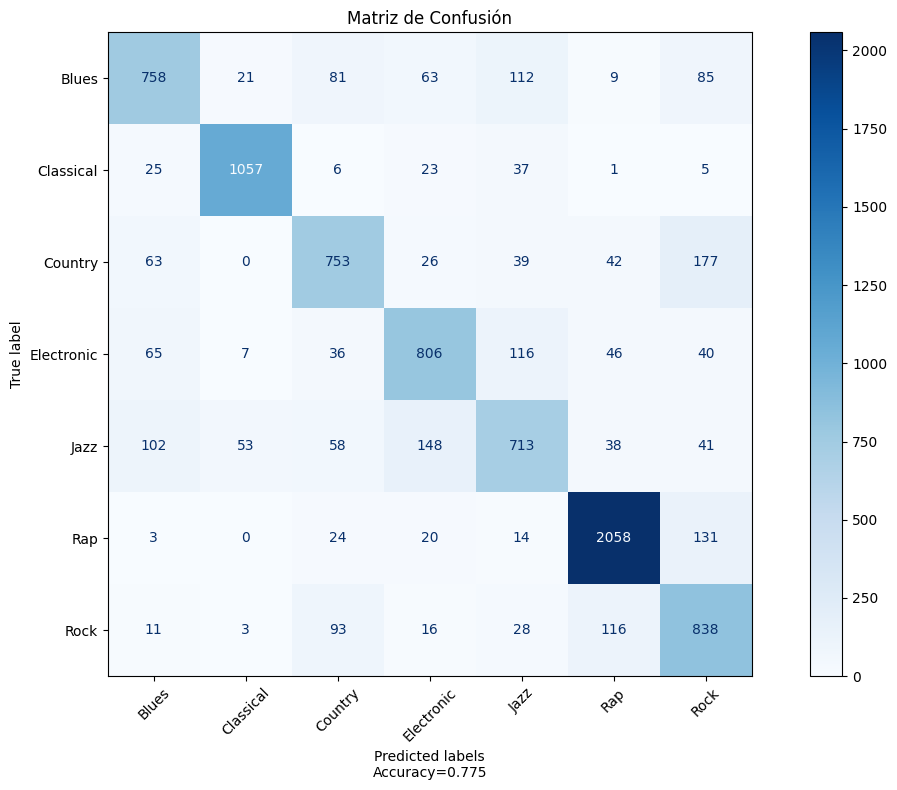

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicciones
y_pred = model.predict(X_test)

# Convertir los nombres de las clases a string
target_names = [str(c) for c in le.classes_]

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, target_names=target_names))

# Matriz de confusión mejorada
# Matriz de confusión mejorada
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12, 8))  # Más espacio para muchas clases
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45, values_format='d')  # Números enteros
plt.title('Matriz de Confusión')
disp.ax_.set_xlabel(f'Predicted labels\nAccuracy={accuracy_score(y_test, y_pred):.3f}')
plt.tight_layout()
plt.show()








---

### Conclusiones y comunicación
Interpretar: ¿Qué géneros son más fáciles de predecir?

La gráfica muestra qué tan importante es cada variable para que el modelo clasifique correctamente el género musical.  
Cada barra representa una variable (por ejemplo, `acousticness` y `loudness`) y su altura indica cuánto contribuye al modelo.  
Las variables con barras más altas son más relevantes para la predicción.  
Esto ayuda a entender qué características musicales influyen más en la clasificación automática de géneros.

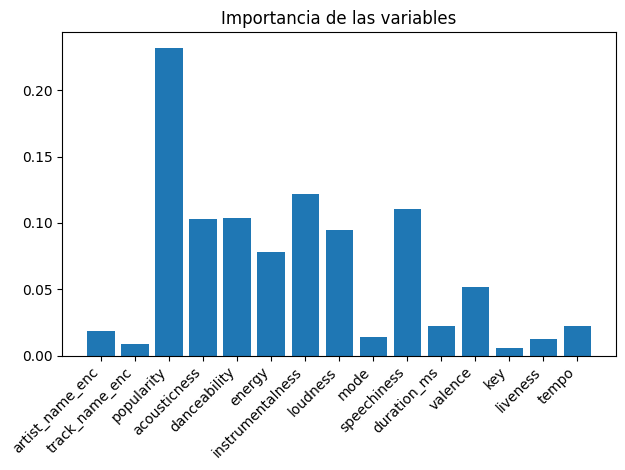

In [10]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
features = X.columns

plt.bar(features, importances)
plt.xticks(rotation=45, ha='right')
plt.title("Importancia de las variables")
plt.tight_layout() 
plt.show()
